### Importing Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Creating UDFs for understanding data or to just extract desired information from data

In [6]:
# Creates data audit Report for continuous variables
def numerical_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.nunique(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'UNIQUE', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [7]:
# Creates data audit Report for categorical variables
def object_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), x.nunique(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS','UNIQUE', 'MODE', 'FREQ', 'PERCENT'])

In [8]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### Importing Dataset

In [9]:
data = pd.read_excel('case_study_data.xlsx')

In [10]:
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [11]:
# Meta-data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

#### Observation : No missing values.
    

In [12]:
#Statistics information about numerical data
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [13]:
#Checking missing values
data.isna().any().sum()

0

In [14]:
# Checking whether the data is imbalanced or not.
data.groupby('status')['status'].agg('count')/data.shape[0]*100

status
1    70.0
2    30.0
Name: status, dtype: float64

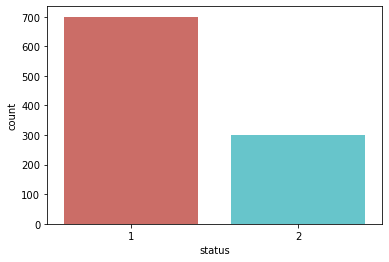

In [15]:
#dependent variable distribution (response vs. non response)
sns.countplot(x='status',data=data, palette='hls')
plt.show()

#### Observation : Data is reasonably balanced

In [16]:
data.groupby('status').mean()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
status,,,,,,,
1,28.912857,4478.431429,4.532857,4.407143,54.58,2.461429,2.155714
2,37.366667,5907.440000,4.776667,4.406667,51.20,2.393333,2.153333


In [17]:
data.groupby('status')['amount'].mean()

status
1    4478.431429
2    5907.440000
Name: amount, dtype: float64

<AxesSubplot:>

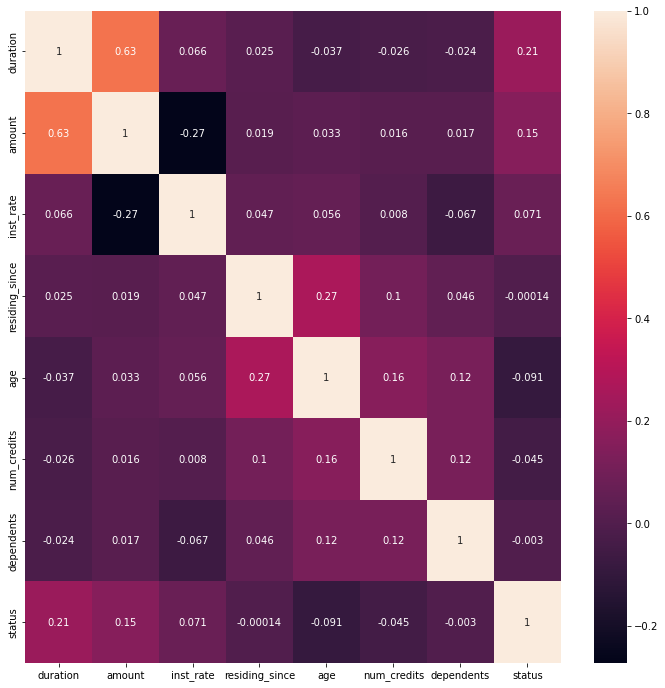

In [18]:
# Visualizing correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr(), annot=True)

### Separating Numerical and Object type data

In [19]:
data_num_vars = data.select_dtypes(include = ['float64', 'int64'])
data_obj_vars  = data.select_dtypes(include = ['object'])

In [23]:
data_num_vars.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
0,1,1754,6,6,101,3,2,1
1,4,8927,3,3,33,2,2,2
2,1,3144,3,5,74,2,3,1
3,4,11823,3,6,68,2,3,1
4,2,7305,5,6,80,3,3,2


In [21]:
data_num_vars.apply(numerical_var_summary).T

,N,NMISS,UNIQUE,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,1000.0,0.0,33.0,31449.0,31.449,27.0,18.055564,3.260034e+02,6.0,9.00,9.0,14.0,18.00,27.0,36.0,54.0,72.00,90.00,108.0
amount,1000.0,0.0,921.0,4907134.0,4907.134,3479.5,4234.100176,1.792760e+07,375.0,638.75,1063.9,1398.0,2048.25,3479.5,5958.5,10769.1,13744.55,21271.08,27636.0
inst_rate,1000.0,0.0,4.0,4606.0,4.606,5.0,1.572016,2.471235e+00,2.0,2.00,2.0,2.0,3.00,5.0,6.0,6.0,6.00,6.00,6.0
residing_since,1000.0,0.0,4.0,4407.0,4.407,5.0,1.570292,2.465817e+00,2.0,2.00,2.0,2.0,3.00,5.0,6.0,6.0,6.00,6.00,6.0
age,1000.0,0.0,53.0,53566.0,53.566,50.0,17.065664,2.912369e+02,29.0,30.00,33.0,35.0,41.00,50.0,63.0,78.0,90.00,101.01,113.0
num_credits,1000.0,0.0,4.0,2441.0,2.441,2.0,0.697858,4.870060e-01,2.0,2.00,2.0,2.0,2.00,2.0,3.0,3.0,3.00,5.00,6.0
dependents,1000.0,0.0,2.0,2155.0,2.155,2.0,0.362086,1.311061e-01,2.0,2.00,2.0,2.0,2.00,2.0,2.0,3.0,3.00,3.00,3.0
status,1000.0,0.0,2.0,1300.0,1.300,1.0,0.458487,2.102102e-01,1.0,1.00,1.0,1.0,1.00,1.0,2.0,2.0,2.00,2.00,2.0


#### Observation : There is not much difference between the 99th percentile and max value while reflects there is no outliers in data.

### Grouping Numerical Variables

#### Numerical variables like duration, age and amount create noise in the data as there are high cardinality for thse variables and there are chances that instead of learning the general pattern, model learn from the actual values which may leads to overfitting.

In [22]:
data_num_vars['duration']=np.where(data_num_vars['duration']>80,5,np.where(data_num_vars['duration']>60,4,np.where(data_num_vars['duration']>40,3,np.where(data_num_vars['duration']>20,2,1))))

In [24]:
data_num_vars['amount']=np.where(data_num_vars['amount']>25000,1,np.where(data_num_vars['amount']>20000,2,np.where(data_num_vars['amount']>15000,3,np.where(data_num_vars['amount']>10000,4,np.where(data_num_vars['amount']>5000,5,6)))))

In [25]:
data_num_vars['age']=np.where(data_num_vars['age']>80,1,np.where(data_num_vars['age']>60,2,np.where(data_num_vars['age']>40,3,4)))

In [26]:
data_num_vars.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
0,1,6,6,6,1,3,2,1
1,4,5,3,3,4,2,2,2
2,1,6,3,5,2,2,3,1
3,4,4,3,6,2,2,3,1
4,2,5,5,6,2,3,3,2


In [22]:
data_obj_vars.head()

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [27]:
data_obj_vars.apply(object_var_summary).T

,N,NMISS,UNIQUE,MODE,FREQ,PERCENT
checkin_acc,1000,0,4,A14,394,39.4
credit_history,1000,0,5,A32,530,53.0
purpose,1000,0,10,A43,280,28.0
svaing_acc,1000,0,5,A61,603,60.3
present_emp_since,1000,0,5,A73,339,33.9
personal_status,1000,0,4,A93,548,54.8
other_debtors,1000,0,3,A101,907,90.7
property,1000,0,4,A123,332,33.2
inst_plans,1000,0,3,A143,814,81.4
housing,1000,0,3,A152,713,71.3


#### Observation : For most of the variables, there is a single observation with high frequency.

### Merging the numerical and object data to check relationship of variables with target variable(status)

In [30]:
data_target_check = pd.concat([data_num_vars,data_obj_vars],axis=1)

### Separating default customers from dataset.

In [31]:
data_target_check_default = data_target_check[data_target_check.status==2]

In [ ]:
data_target_check_default.shape

(300, 21)

In [34]:
data_target_check_default.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'dependents', 'status', 'checkin_acc', 'credit_history',
       'purpose', 'svaing_acc', 'present_emp_since', 'personal_status',
       'other_debtors', 'property', 'inst_plans', 'housing', 'job',
       'telephone', 'foreign_worker'],
      dtype='object')

In [28]:
# Grouping each variable with status variable to check which value within a variable corresponds to most default customers.
for i in data_target_check.columns:
    print(data_target_check.groupby([data_target_check[i],data_target_check['status']])['status'].agg('count')/data_target_check.shape[0]*100)

duration  status
1         1         28.7
          2          7.6
2         1         28.6
          2         12.2
3         1          8.9
          2          5.9
4         1          3.0
          2          3.5
5         1          0.8
          2          0.8
Name: status, dtype: float64
amount  status
1       2          0.1
2       1          0.4
        2          0.8
3       1          1.2
        2          1.5
4       1          4.5
        2          3.3
5       1         15.5
        2          6.7
6       1         48.4
        2         17.6
Name: status, dtype: float64
inst_rate  status
2          1         10.2
           2          3.4
3          1         16.9
           2          6.2
5          1         11.2
           2          4.5
6          1         31.7
           2         15.9
Name: status, dtype: float64
residing_since  status
2               1          9.4
                2          3.6
3               1         21.1
                2          9.7
5    

In [29]:
# For all default customers only, checking which value among each variable corresponds to bad customers.
for i in data_target_check_default.columns:
    print(data_target_check_default.groupby(data_target_check_default[i])['status'].agg('count')/data_target_check_default.shape[0]*100)

duration
1    25.333333
2    40.666667
3    19.666667
4    11.666667
5     2.666667
Name: status, dtype: float64
amount
1     0.333333
2     2.666667
3     5.000000
4    11.000000
5    22.333333
6    58.666667
Name: status, dtype: float64
inst_rate
2    11.333333
3    20.666667
5    15.000000
6    53.000000
Name: status, dtype: float64
residing_since
2    12.000000
3    32.333333
5    14.333333
6    41.333333
Name: status, dtype: float64
age
1     8.000000
2    16.000000
3    44.666667
4    31.333333
Name: status, dtype: float64
num_credits
2    66.666667
3    30.666667
5     2.000000
6     0.666667
Name: status, dtype: float64
dependents
2    84.666667
3    15.333333
Name: status, dtype: float64
status
2    100.0
Name: status, dtype: float64
checkin_acc
A11    45.000000
A12    35.000000
A13     4.666667
A14    15.333333
Name: status, dtype: float64
credit_history
A30     8.333333
A31     9.333333
A32    56.333333
A33     9.333333
A34    16.666667
Name: status, dtype: float64
purpose
A

### Creating Dummy Variables for Categorical Data

In [30]:
for c_feature in data_obj_vars.columns:
    data_obj_vars = create_dummies(data_obj_vars, c_feature )

In [31]:
data_obj_vars.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


### Final Data

In [32]:
data_final=pd.concat([data_num_vars,data_obj_vars],axis=1)

In [33]:
data_final.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,1,6,6,6,1,3,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,4,5,3,3,4,2,2,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,1,6,3,5,2,2,3,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,4,4,3,6,2,2,3,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,5,5,6,2,3,3,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [34]:
data_final.shape

(1000, 49)

In [35]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int32
 1   amount                 1000 non-null   int32
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int32
 5   num_credits            1000 non-null   int64
 6   dependents             1000 non-null   int64
 7   status                 1000 non-null   int64
 8   checkin_acc_A12        1000 non-null   uint8
 9   checkin_acc_A13        1000 non-null   uint8
 10  checkin_acc_A14        1000 non-null   uint8
 11  credit_history_A31     1000 non-null   uint8
 12  credit_history_A32     1000 non-null   uint8
 13  credit_history_A33     1000 non-null   uint8
 14  credit_history_A34     1000 non-null   uint8
 15  purpose_A41            1000 non-null   

In [36]:
data_final.apply(numerical_var_summary).T

,N,NMISS,UNIQUE,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,1000.0,0.0,5.0,1963.0,1.963,2.0,0.956319,0.914546,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.00,5.0,5.0
amount,1000.0,0.0,6.0,5488.0,5.488,6.0,0.855914,0.732589,1.0,2.0,4.0,4.0,5.0,6.0,6.0,6.0,6.00,6.0,6.0
inst_rate,1000.0,0.0,4.0,4606.0,4.606,5.0,1.572016,2.471235,2.0,2.0,2.0,2.0,3.0,5.0,6.0,6.0,6.00,6.0,6.0
residing_since,1000.0,0.0,4.0,4407.0,4.407,5.0,1.570292,2.465817,2.0,2.0,2.0,2.0,3.0,5.0,6.0,6.0,6.00,6.0,6.0
age,1000.0,0.0,4.0,2877.0,2.877,3.0,0.875578,0.766638,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.00,4.0,4.0
num_credits,1000.0,0.0,4.0,2441.0,2.441,2.0,0.697858,0.487006,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.00,5.0,6.0
dependents,1000.0,0.0,2.0,2155.0,2.155,2.0,0.362086,0.131106,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.00,3.0,3.0
status,1000.0,0.0,2.0,1300.0,1.300,1.0,0.458487,0.210210,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,2.0
checkin_acc_A12,1000.0,0.0,2.0,269.0,0.269,0.0,0.443662,0.196836,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0,1.0
checkin_acc_A13,1000.0,0.0,2.0,63.0,0.063,0.0,0.243085,0.059090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0


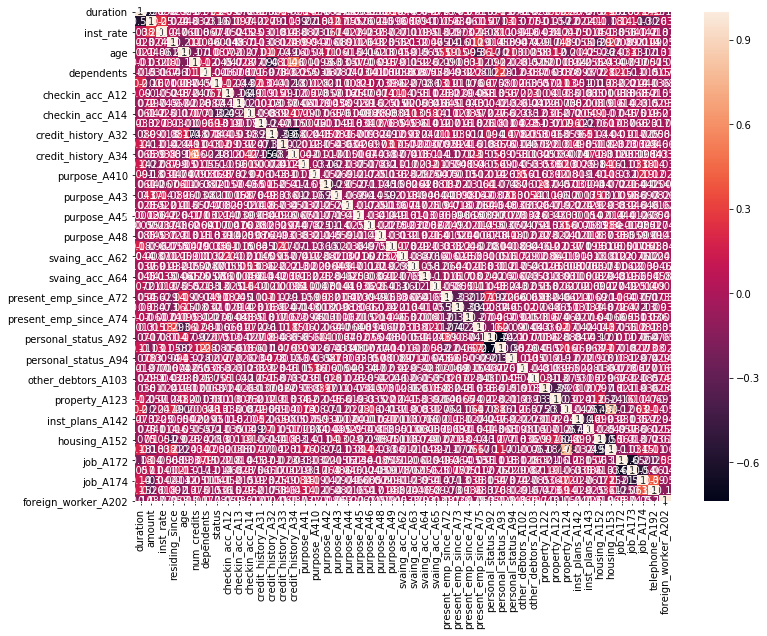

In [37]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(data_final.corr(), annot=True)

### Splitting Data into Training and Testing

In [38]:
feature_columns = data_final.columns.difference( ['status'] )
feature_columns

Index(['age', 'amount', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'dependents', 'duration',
       'foreign_worker_A202', 'housing_A152', 'housing_A153',
       'inst_plans_A142', 'inst_plans_A143', 'inst_rate', 'job_A172',
       'job_A173', 'job_A174', 'num_credits', 'other_debtors_A102',
       'other_debtors_A103', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'present_emp_since_A72', 'present_emp_since_A73',
       'present_emp_since_A74', 'present_emp_since_A75', 'property_A122',
       'property_A123', 'property_A124', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'residing_since',
       'svaing_acc_A62', 'svaing_acc_A63', 'svaing_acc_A64', 'svaing_acc_A65',
       'telephone_A192'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( data_final[feature_columns],
                                                  data_final['status'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

## Model Building

### Logistic Regression

In [40]:
# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

logreg = LogisticRegression()
logreg.fit( train_X, train_y)

LogisticRegression()

In [41]:
#Predicting the test cases
logreg_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [42]:
logreg_accuracy_score=metrics.accuracy_score( logreg_test_pred.actual, logreg_test_pred.predicted )
logreg_roc_auc_score=metrics.roc_auc_score( logreg_test_pred.actual, logreg_test_pred.predicted )

In [43]:
print(logreg_accuracy_score)
print(logreg_roc_auc_score)

0.7733333333333333
0.7224999999999999


Text(0.5, 15.0, 'Predicted label')

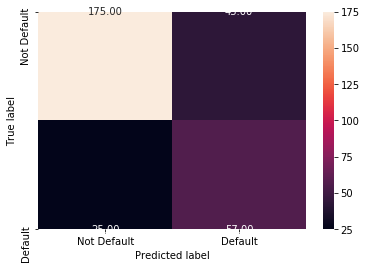

In [44]:
tree_cm = metrics.confusion_matrix( logreg_test_pred.predicted,
                                 logreg_test_pred.actual,
                                 [1,2] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Default", "Default"] , yticklabels = ["Not Default", "Default"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [5,6,7,8,9,10,11,12]}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=7,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 7 folds for each of 48 candidates, totalling 336 fits


In [46]:
gscv_results.best_params_

{'max_features': 9, 'n_estimators': 80}

In [47]:
# Final model using best-parameters
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=80, max_features=9, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=9, n_estimators=80, n_jobs=-1,
                       oob_score=True)

In [48]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [49]:
radm_clf_accuracy_score=metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )
radm_clf_roc_auc_score=metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted )

In [50]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.76
0.6775


Text(0.5, 15.0, 'Predicted label')

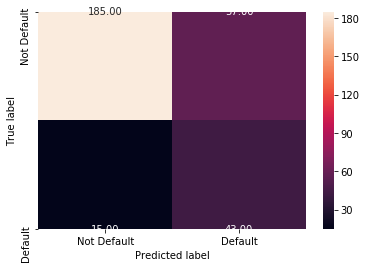

In [51]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted, radm_test_pred.actual,[1,2] )

sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Default", "Default"] , yticklabels = ["Not Default", "Default"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### RandomForest also provides feature importance

In [52]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[0.04225877 0.04008835 0.02304569 0.01557928 0.07243847 0.01569918
 0.01898657 0.01508398 0.02383369 0.01515365 0.06816004 0.0061685
 0.02429283 0.00940568 0.0120897  0.02696305 0.05410611 0.01803085
 0.01927187 0.01371215 0.02621845 0.01079596 0.01360999 0.01918167
 0.02171887 0.01099118 0.02161537 0.02039438 0.01547995 0.01723934
 0.02309466 0.02241018 0.01225573 0.01596929 0.00213282 0.0230068
 0.01946311 0.00254565 0.0071899  0.01193611 0.00069484 0.01620665
 0.05282578 0.01326246 0.01142475 0.00758392 0.02231566 0.02406814]
[40 34 37 11 38 45 13 21 25 44 39 14 32 43 22 19  7  9 28  3  5 33 41 29
 17  6 23 18 36 27 26 24 46 31 35  2 30  8 47 12 20 15  1  0 42 16 10  4]


In [53]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

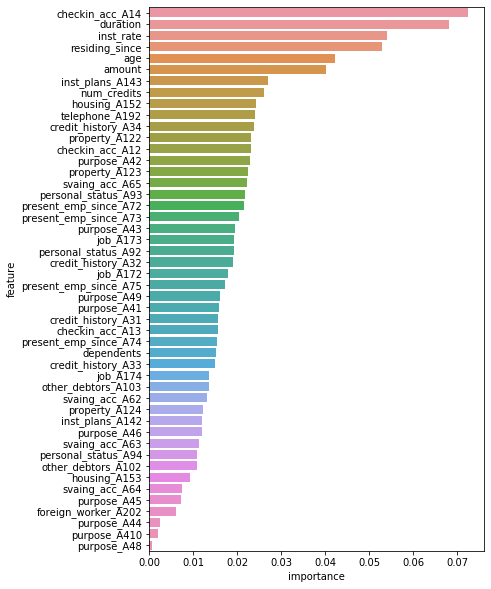

In [54]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
fig_dims=(6,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot( y = 'feature', x = 'importance', data = feature_rank,ax=ax )

### Gradient Boosting Method

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
pargrid_gbm = {'n_estimators': [350,400,450,500,550,600,650],
               'learning_rate': [10 ** x for x in range(-3, 1)],
                'max_features': [5,6,7,8,9,10]}

gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_gbm, 
                        cv=7,
                        verbose=True, n_jobs=-1)
gscv_gbm.fit(train_X, train_y)

Fitting 7 folds for each of 168 candidates, totalling 1176 fits


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_features': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [350, 400, 450, 500, 550, 600, 650]},
             verbose=True)

In [57]:
gscv_gbm.best_params_

{'learning_rate': 0.1, 'max_features': 6, 'n_estimators': 600}

In [58]:
# Final model using best parameters
gbm_clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=600, max_features=6)
gbm_clf.fit( train_X, train_y )

GradientBoostingClassifier(max_features=6, n_estimators=600)

In [59]:
gbm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': gbm_clf.predict( test_X ) } )

In [60]:
gbm_accuracy_score=metrics.accuracy_score( gbm_test_pred.actual, gbm_test_pred.predicted )
gbm_roc_auc_score=metrics.roc_auc_score( gbm_test_pred.actual, gbm_test_pred.predicted )

In [61]:
print(gbm_accuracy_score)
print(gbm_roc_auc_score)

0.7766666666666666
0.74


Text(0.5, 15.0, 'Predicted label')

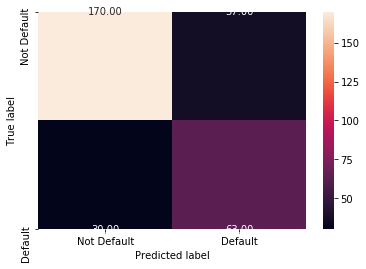

In [62]:
tree_cm = metrics.confusion_matrix( gbm_test_pred.predicted,
                                 gbm_test_pred.actual,
                                 [1,2] )

sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Default", "Default"] , yticklabels = ["Not Default", "Default"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Xtreme Gradient Boosting

In [63]:
from xgboost import XGBClassifier

In [64]:
pargrid_gbm = {'n_estimators': [300,350,400,450,500,550,600],
               'learning_rate': [10 ** x for x in range(-3, 1)]}

gscv_xgbm = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=pargrid_gbm, 
                        cv=7,
                        verbose=True, n_jobs=-1)
gscv_xgbm.fit(train_X, train_y)

Fitting 7 folds for each of 28 candidates, totalling 196 fits


GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [65]:
gscv_xgbm.best_params_

{'learning_rate': 0.01, 'n_estimators': 350}

In [66]:
# Final model using best parameters
xgbm_clf = XGBClassifier(learning_rate=0.01,n_estimators=350)
xgbm_clf.fit( train_X, train_y )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgbm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': xgbm_clf.predict( test_X ) } )

In [68]:
xgbm_accuracy_score=metrics.accuracy_score( xgbm_test_pred.actual, xgbm_test_pred.predicted )
xgbm_roc_auc_score=metrics.roc_auc_score( xgbm_test_pred.actual, xgbm_test_pred.predicted )

In [69]:
print(xgbm_accuracy_score)
print(xgbm_roc_auc_score)

0.7533333333333333
0.6825


Text(0.5, 15.0, 'Predicted label')

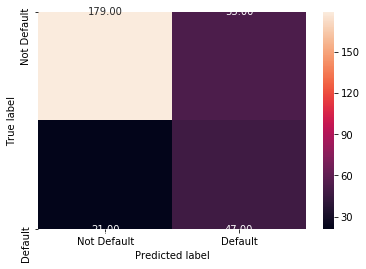

In [70]:
tree_cm = metrics.confusion_matrix( xgbm_test_pred.predicted,
                                 xgbm_test_pred.actual,
                                 [1,2] )

sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Default", "Default"] , yticklabels = ["Not Default", "Default"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Comparing accuracy and AUC-ROC metrics for different models

In [71]:
# Logistic regression
print('Logreg_Accuracy:',logreg_accuracy_score)
print('Logreg_ROC_AUC:',logreg_roc_auc_score)

Logreg_Accuracy: 0.7733333333333333
Logreg_ROC_AUC: 0.7224999999999999


In [72]:
# Random Forest Classifier
print('radm_clf_accuracy_score:',radm_clf_accuracy_score)
print('radm_clf_roc_auc_score:',radm_clf_roc_auc_score)

radm_clf_accuracy_score: 0.76
radm_clf_roc_auc_score: 0.6775


In [73]:
# Gradient Boosting
print('gbm_accuracy_score:',gbm_accuracy_score)
print('gbm_roc_auc_score:',gbm_roc_auc_score)

gbm_accuracy_score: 0.7766666666666666
gbm_roc_auc_score: 0.74


In [74]:
# Xtreme Gardient Boosting
print('xbgm_accuracy_score:',xgbm_accuracy_score)
print('xbgm_roc_auc_score:',xgbm_roc_auc_score)

xbgm_accuracy_score: 0.7533333333333333
xbgm_roc_auc_score: 0.6825


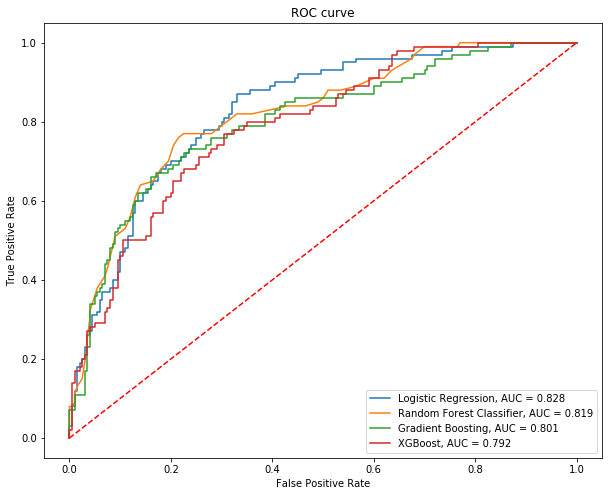

In [75]:
#ROC AUC
fig = plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')

#Logistic Regression
preds_proba_lg = logreg.predict_proba(test_X)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(test_y, probslg,pos_label=2)
auclg = roc_auc_score(test_y, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#RF
preds_proba_rcf = radm_clf.predict_proba(test_X)
probsrcf = preds_proba_rcf[:, 1]
fpr, tpr, thresh = metrics.roc_curve(test_y, probsrcf,pos_label=2)
aucrcf = roc_auc_score(test_y, probsrcf)
plt.plot(fpr, tpr, label=f'Random Forest Classifier, AUC = {str(round(aucrcf,3))}')

#Gboosting
preds_proba_gb = gbm_clf.predict_proba(test_X)
probsgb = preds_proba_gb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(test_y, probsgb,pos_label=2)
aucgb = roc_auc_score(test_y, probsgb)
plt.plot(fpr, tpr, label=f'Gradient Boosting, AUC = {str(round(aucgb,3))}')

#XGBoost
preds_proba_xgb = xgbm_clf.predict_proba(test_X)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(test_y, probsxgb,pos_label=2)
aucxgb = roc_auc_score(test_y, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

### On the basis of ROC curve, highest AUC score is given by Logistic Regression i.e. 0.828. So, final prediction will be on the basis of Logistic Regression only.

In [76]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )
test_pred = test_pred.reset_index()

In [77]:
test_pred

,index,actual,predicted
0,131,2,2
1,203,2,1
2,50,1,1
3,585,2,2
4,138,1,1
...,...,...,...
295,556,2,2
296,598,2,1
297,458,1,2
298,586,1,1


### Feature Importance

In [78]:
features = train_X.columns
features

Index(['age', 'amount', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'dependents', 'duration',
       'foreign_worker_A202', 'housing_A152', 'housing_A153',
       'inst_plans_A142', 'inst_plans_A143', 'inst_rate', 'job_A172',
       'job_A173', 'job_A174', 'num_credits', 'other_debtors_A102',
       'other_debtors_A103', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'present_emp_since_A72', 'present_emp_since_A73',
       'present_emp_since_A74', 'present_emp_since_A75', 'property_A122',
       'property_A123', 'property_A124', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'residing_since',
       'svaing_acc_A62', 'svaing_acc_A63', 'svaing_acc_A64', 'svaing_acc_A65',
       'telephone_A192'],
      dtype='object')

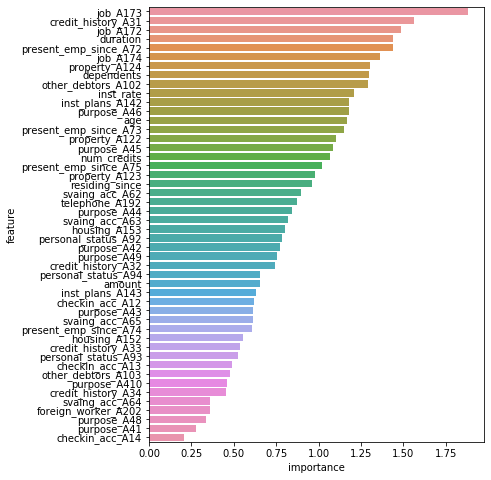

In [79]:
import math
w=logreg.coef_[0]
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

from sklearn.linear_model import LogisticRegression
fig_dims=(6,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot( y = 'feature', x = 'importance', data = feature_importance,ax=ax )
